# ONI calculation

In [1]:
import pump
from pump import mixpods
import xarray as xr

/glade/u/home/dcherian/miniconda3/envs/pump/lib/python3.10/site-packages/dask_jobqueue/core.py:20: FutureWarning: tmpfile is deprecated and will be removed in a future release. Please use dask.utils.tmpfile instead.
  from distributed.utils import tmpfile


### Phase labeling

In [ ]:
oni = pump.obs.process_oni().sel(time=slice("2005-Sep", None))
enso_transition = mixpods.make_enso_transition_mask(oni)
mixpods.plot_enso_transition(oni, enso_transition)

:Overlay
   .Bars.I   :Bars   [time,Variable]   (value)
   .Bars.II  :Bars   [time,Variable]   (value)
   .Bars.III :Bars   [time,Variable]   (value)
   .Bars.IV  :Bars   [time,Variable]   (value)
   .Bars.V   :Bars   [time,Variable]   (value)

### Replicate ONI calculation

close enough!

[<matplotlib.lines.Line2D>]

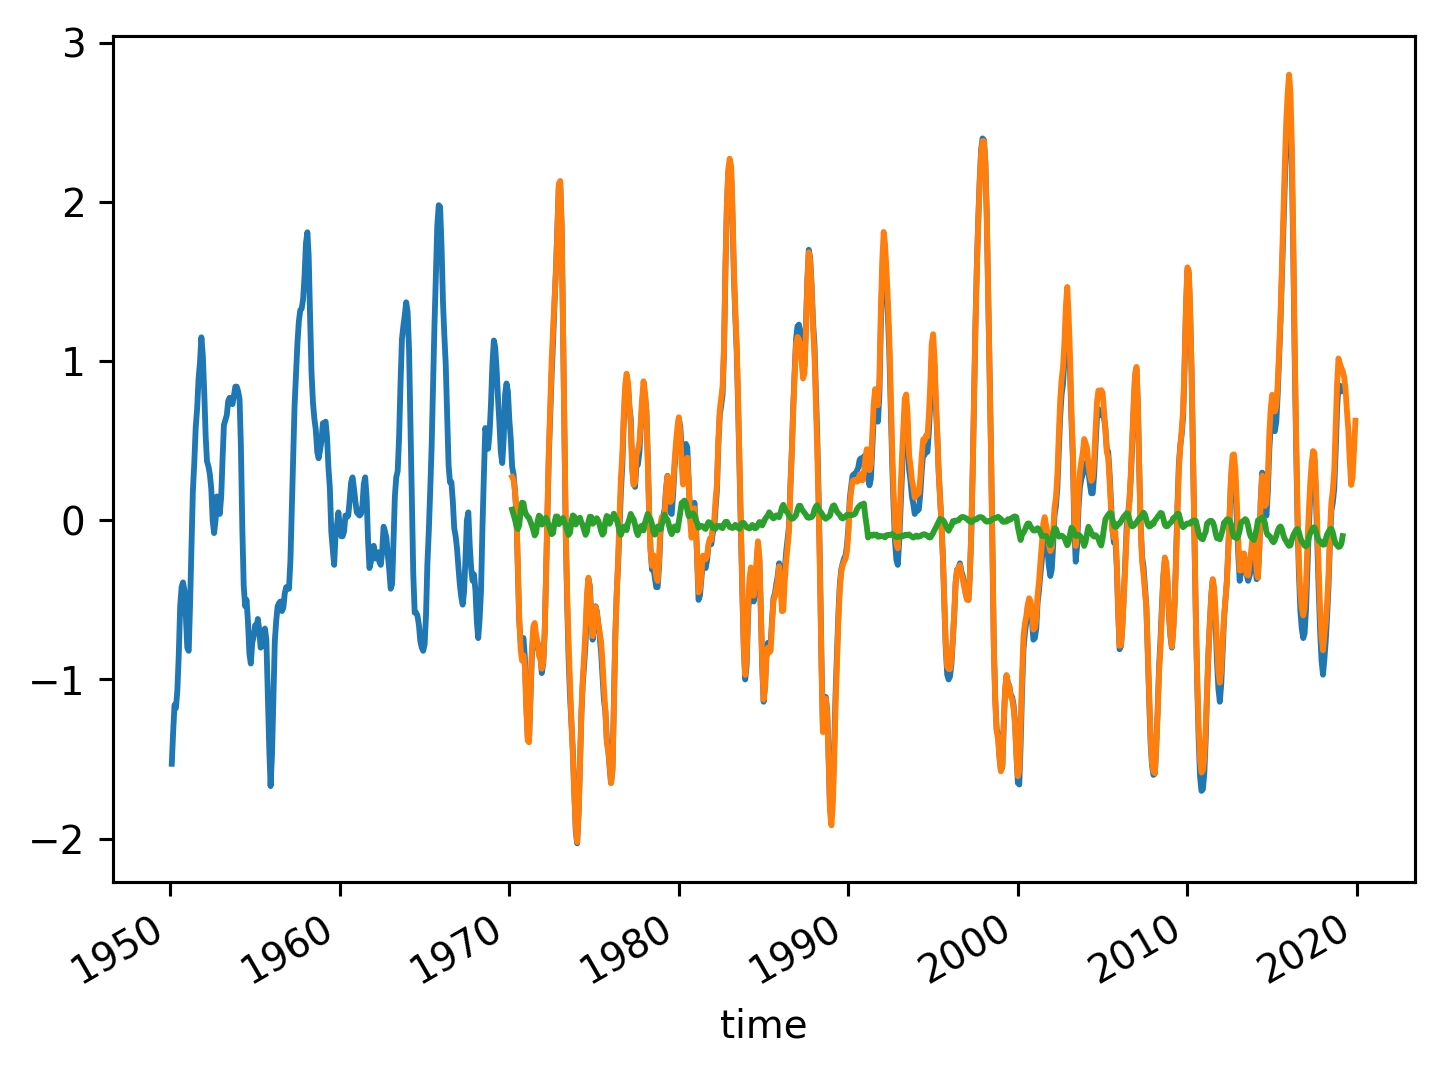

In [ ]:
ersst = xr.tutorial.open_dataset("ersstv5")

monthlyersst = (
    ersst.sst.cf.sortby("Y")
    .cf.sel(latitude=slice(-5, 5), longitude=slice(360 - 170, 360 - 120))
    .cf.mean(["X", "Y"])
    .resample(time="M")
    .mean()
    .load()
)

expected = mixpods.calc_oni(monthlyersst)

actual = pump.obs.process_oni()
actual.plot()
expected.plot()

(actual - expected).plot()

### Comparing to Warner and Moum code

In [ ]:
chipod.eps.sel(time="2007-01-14 10:35:00", method="nearest").load()

<xarray.DataArray 'eps' (depth: 5)>
nan 3.929e-07 2.846e-07 2.234e-07 4.491e-07
Coordinates:
    time        datetime64[ns] 2007-01-14T11:00:00
  * depth       (depth) float64 -69.0 -59.0 -49.0 -39.0 -29.0
    timeSeries  (depth) float64 69.0 59.0 49.0 39.0 29.0
    lat         (depth) float64 0.0 0.0 0.0 0.0 0.0
    lon         (depth) float64 -140.0 -140.0 -140.0 -140.0 -140.0
Attributes:
    long_name:              turbulence dissipation rate
    standard_name:          specific_turbulent_kinetic_energy_dissipation_in_...
    ncei_name:              turbulent kinetic energy (TKE) dissipation rate
    units:                  W kg-1
    FillValue:              -9999
    valid_min:              1e-12
    valid_max:              9.999999999999999e-06
    coverage_content_type:  physicalMeasurement
    grid_mapping:           crs
    source:                 inferred from fast thermistor spectral scaling
    references:             Moum J.N. and J.D. Nash, Mixing measurements on a...
    cell_methods:           depth: point, time: mean
    platform:               mooring
    instrument:             chipod

In [ ]:
tao_gridded.enso_transition.loc[{"time": slice("2015-12", "2016-01")}]

<xarray.DataArray 'enso_transition' (time: 1488)>
'El-Nino warm' 'El-Nino warm' 'El-Nino warm' ... 'El-Nino warm' 'El-Nino warm'
Coordinates: (12/13)
    deepest             (time) float64 -300.0 -300.0 -300.0 ... -300.0 -300.0
    eucmax              (time) float64 -135.0 -140.0 -135.0 ... -140.0 -135.0
    latitude            float32 0.0
    longitude           float32 -140.0
    mld                 (time) float64 -9.0 -8.0 -8.0 -8.0 ... nan nan nan nan
    mldT                (time) float64 -10.0 -8.0 -8.0 -8.0 ... nan nan nan nan
    ...                  ...
    shallowest          (time) float64 -5.0 -5.0 -5.0 -5.0 ... -10.0 -10.0 -10.0
  * time                (time) datetime64[ns] 2015-12-01 ... 2016-01-31T23:00:00
    oni                 (time) float32 2.53 2.53 2.53 2.53 ... 2.53 2.53 2.53
    warm_mask           (time) bool True True True True ... False False False
    cool_mask           (time) bool False False False False ... True True True
    enso_transition     (time) <U12 'El-Nino warm' ... 'El-Nino warm'
Attributes:
    description:  Warner & Moum (2019) ENSO transition phase; El-Nino = ONI >...